In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="white")

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

In [4]:
df = pd.read_csv("final_export.csv")

/home/bhrt/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,10,11,15,21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(24234, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24234 entries, 0 to 24233
Data columns (total 39 columns):
PAYMENTTOKENID               24234 non-null object
MERCHANTID                   24166 non-null object
CURRENCYTYPE                 23721 non-null object
AMOUNT                       24232 non-null float64
INVOICEID                    23354 non-null object
TRANSACTIONID                23333 non-null object
DESCRIPTION                  24096 non-null object
PAYMENTOPTION                24164 non-null object
PAYMENTOPTIONDESC            22873 non-null object
INITIALURL                   4853 non-null object
ACCTYPE                      23724 non-null object
AUTHRESULT                   23765 non-null object
EXPIRYTIME                   23665 non-null float64
IPADDRESS                    9050 non-null object
USERID                       9688 non-null object
TRANSACTIONRESULT            23614 non-null object
AMOUNTDEDUCTED               23764 non-null float64
TRANSACTIONTIME         

In [7]:
df.head(2)

,PAYMENTTOKENID,MERCHANTID,CURRENCYTYPE,AMOUNT,INVOICEID,TRANSACTIONID,DESCRIPTION,PAYMENTOPTION,PAYMENTOPTIONDESC,INITIALURL,...,COREREFNO,RESERVE1,RESERVE2,TXMERCHANTACCOUNT,TXDIRECTION,IBUSERID,FAILEDREASON,MINISTERY_TYPE,MINISTERY_STATUS,MINISTERY_RESPONSE
0,pTY12P19/J74VJ+B81qrW9S0POA=,3zj8pEw96jSgMxu7PqLioz9Q2jg=,USD,1.0,NaN,NaN,1@DEP/A/5611/LHPP,1,1@DEP/A/5611/LHPP,NaN,...,NaN,NaN,0.0,1.086982e+10,2.0,NaN,NaN,NaN,NaN,NaN
1,q+VwbNG3zyzuQRGAbd9N8lQItgg=,qIcBVYncKJs5CTsWkRPPzoGjN9U=,KHR,100000.0,20170220,561,10@mobile,2,10@mobile,https://www.registeredurl.com/,...,NaN,NaN,0.0,NaN,0.0,XPAYqlcvrEwOh7eO5BKjnD86tQeDVT4=,NaN,NaN,NaN,NaN


# 1- PAYMENTTOKEN_ID --> Drop it

In [8]:
df['PAYMENTTOKENID'].value_counts()

                                399
                                  2
IU3aznCHbwXYSvA0kleH9vWymHQ=      1
MPIEv9nonUWTnK0uqcC0AqPxADU=      1
Yzm4DaU1fGVuIFKjdr7xpFxcd4k=      1
                               ... 
aFP1+d8cLCt/nUP+8q3ltVVkxNo=      1
ArK2qkUxfKRi+5h12notzGokWpA=      1
/0cWKl/rWzhNO2mMpStGzntkgyM=      1
ZWR61z0DfDQp5ZyxQ0zOaReC9VY=      1
OWrmn3NupmT/sBOS4PGpCqu3WWc=      1
Name: PAYMENTTOKENID, Length: 23835, dtype: int64

In [9]:
df=df.drop(labels="PAYMENTTOKENID",axis=1)

In [10]:
############dropping as of no use

# 2- MERCHANT_ID --> 

In [11]:
df['MERCHANTID'].value_counts()

qIcBVYncKJs5CTsWkRPPzoGjN9U=    4126
Iv7guYSRaGlbn8VtE6ggOcvJaEw=    3320
OiiV9lElGi7dr9W8vEJ+s7AiNuU=    3017
/YhHi3+sdQKrev3Jftz2j7gi0fc=    2460
OGLyZb6Becol1flTnzJbQcuMgvY=    2260
sJ9IV7KGWDzJ8lewFFk5roa4NOc=    1733
lLNwopc0JRtnGqH2H1FpNS4AX6w=    1114
dzWRz4j29lF6s4du9N6zZQuEHmE=     679
Govr/9xSzpe9+QZUCHdna9qdY3A=     559
JgCNsg4v6EqeJCD+oppKIKrqDLY=     555
D9FKOsUTR1mOjFwJJmKHmWAACvg=     502
NPcDKCr1nq8RYtw3ckDv6q8+rh4=     449
msaZn/oKWm62QasqrWqG/SK7rVQ=     394
3dhwRylPo/1aZJEWSds7bx84cT0=     390
sfWcxlbvfgdt+2q4SEnbX9mBEyo=     380
Mp1WW5Ff9xtpCqM4v1BFPeToOKw=     347
2                                331
Gp4DCQV0Z7t/oDjtJhdi+w66W8I=     249
3zj8pEw96jSgMxu7PqLioz9Q2jg=     241
ur/b0VC1IkH4PbweFD6Y6Ugxzr4=     204
myTyNMOCJUG+jzbbKch5A/1dqLo=     155
87880MWyMwompQFBIKTsIBYSgeE=     154
3sViRaTvy2LJ7jHcqxSG4rJIf3Y=     143
C0V5fDbR+MRQKJ0r1B/YwHmJoPw=     127
AoGGr/9CbWw82q1Z7meWv7uxEVY=     111
EnRKL8zXkSnMpLuHhdRewhmJ4qg=      54
18GJqJDTj3OmKcccHMEnq7w4kXU=      32
6

In [12]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace ="qIcBVYncKJs5CTsWkRPPzoGjN9U=", 
                 value ="A")

In [13]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "Iv7guYSRaGlbn8VtE6ggOcvJaEw=",value="B")

In [14]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "OiiV9lElGi7dr9W8vEJ+s7AiNuU=",value="C")

In [15]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "/YhHi3+sdQKrev3Jftz2j7gi0fc=",
                                         value="D")

In [16]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace = "OGLyZb6Becol1flTnzJbQcuMgvY=",
                                         value="E")

In [17]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="sJ9IV7KGWDzJ8lewFFk5roa4NOc=",
                                         value="F")

In [18]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="lLNwopc0JRtnGqH2H1FpNS4AX6w=",
                                         value="G")

In [19]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="dzWRz4j29lF6s4du9N6zZQuEHmE=",
                                         value="H")

In [20]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="Govr/9xSzpe9+QZUCHdna9qdY3A=",
                                         value="I")

In [21]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="JgCNsg4v6EqeJCD+oppKIKrqDLY=",
                                         value="J")

In [22]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace="D9FKOsUTR1mOjFwJJmKHmWAACvg=",
                                         value="K")

In [23]:
df['MERCHANTID'].value_counts()

A                               4126
B                               3320
C                               3017
D                               2460
E                               2260
F                               1733
G                               1114
H                                679
I                                559
J                                555
K                                502
NPcDKCr1nq8RYtw3ckDv6q8+rh4=     449
msaZn/oKWm62QasqrWqG/SK7rVQ=     394
3dhwRylPo/1aZJEWSds7bx84cT0=     390
sfWcxlbvfgdt+2q4SEnbX9mBEyo=     380
Mp1WW5Ff9xtpCqM4v1BFPeToOKw=     347
2                                331
Gp4DCQV0Z7t/oDjtJhdi+w66W8I=     249
3zj8pEw96jSgMxu7PqLioz9Q2jg=     241
ur/b0VC1IkH4PbweFD6Y6Ugxzr4=     204
myTyNMOCJUG+jzbbKch5A/1dqLo=     155
87880MWyMwompQFBIKTsIBYSgeE=     154
3sViRaTvy2LJ7jHcqxSG4rJIf3Y=     143
C0V5fDbR+MRQKJ0r1B/YwHmJoPw=     127
AoGGr/9CbWw82q1Z7meWv7uxEVY=     111
EnRKL8zXkSnMpLuHhdRewhmJ4qg=      54
18GJqJDTj3OmKcccHMEnq7w4kXU=      32
6

In [24]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace=["D9FKOsUTR1mOjFwJJmKHmWAACvg=","NPcDKCr1nq8RYtw3ckDv6q8+rh4=",
                                                      "msaZn/oKWm62QasqrWqG/SK7rVQ=","3dhwRylPo/1aZJEWSds7bx84cT0=",
                                                      "sfWcxlbvfgdt+2q4SEnbX9mBEyo=","Mp1WW5Ff9xtpCqM4v1BFPeToOKw=",
                                                      "2","Gp4DCQV0Z7t/oDjtJhdi+w66W8I=",
                                                      "3zj8pEw96jSgMxu7PqLioz9Q2jg=","ur/b0VC1IkH4PbweFD6Y6Ugxzr4=",
                                                      "myTyNMOCJUG+jzbbKch5A/1dqLo=","87880MWyMwompQFBIKTsIBYSgeE=",
                                                      "3sViRaTvy2LJ7jHcqxSG4rJIf3Y=","C0V5fDbR+MRQKJ0r1B/YwHmJoPw=",
                                                      "AoGGr/9CbWw82q1Z7meWv7uxEVY=","EnRKL8zXkSnMpLuHhdRewhmJ4qg=",
                                                      "18GJqJDTj3OmKcccHMEnq7w4kXU=","6oVPkwzwqjDuqGg9uh4iM1rMx+s=",
                                                      "qwahWHdBOCZhTXtZxIy2gB1GFTs=","0xEdAeGUUE6Eo2Go1FVjc4NP8b0=",
                                                      "MyN8zSBExuNPDdUSpH6tmNMEwXo=","qZNts+xKrqKm+Yat81CKRAGdx1g=",
                                                      "eKgbtyn8kXokTdTFlNnGXVK9Ryg=","bp0BxY4k+/unVRE7GVenksK4M9k=",
                                                      "-1","0"],
                                         value="OTHERS")

In [25]:
df['MERCHANTID'].value_counts()

A         4126
OTHERS    3841
B         3320
C         3017
D         2460
E         2260
F         1733
G         1114
H          679
I          559
J          555
K          502
Name: MERCHANTID, dtype: int64

In [26]:
df['MERCHANTID'].unique()

array(['OTHERS', 'A', 'D', 'B', 'E', 'C', 'K', 'G', 'F', 'H', 'J', nan,
       'I'], dtype=object)

In [27]:
from numpy  import nan

In [28]:
df['MERCHANTID']=df['MERCHANTID'].replace(to_replace=nan,value="Missing")

In [29]:
df['MERCHANTID'].value_counts()

A          4126
OTHERS     3841
B          3320
C          3017
D          2460
E          2260
F          1733
G          1114
H           679
I           559
J           555
K           502
Missing      68
Name: MERCHANTID, dtype: int64

In [30]:
serie = df.loc[:,"MERCHANTID"].value_counts()

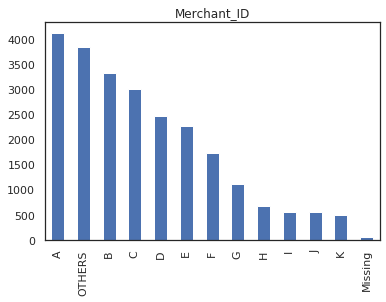

In [31]:
serie.plot(kind='bar',title="Merchant_ID")

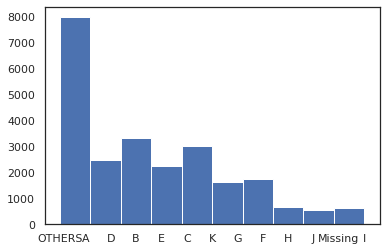

In [32]:
plt.hist(df['MERCHANTID'])
plt.show()

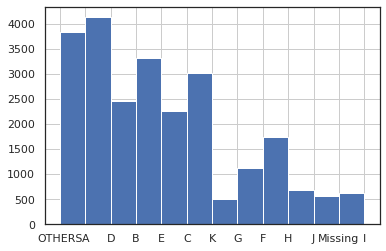

In [33]:
df['MERCHANTID'].hist(bins=12)

([<matplotlib.patches.Wedge at 0x7f1d442c40b8>,
 [Text(0.9463644270850915, 0.5607088113699541, ''),
  Text(0.0034224363190437463, 1.0999946758642254, ''),
  Text(-0.8786220098732789, 0.6618333353392228, ''),
  Text(-1.0830233715260538, -0.1925107184765032, ''),
  Text(-0.6958258878147943, -0.8519544200523603, ''),
  Text(-0.08021222447507693, -1.097071556027573, ''),
  Text(0.4731566633365804, -0.9930371452972915, ''),
  Text(0.7995344350128247, -0.7554764637159277, ''),
  Text(0.9520569841362494, -0.550987748463965, ''),
  Text(1.0278707281460089, -0.39176748999960886, ''),
  Text(1.0735513274508945, -0.2397656091444779, ''),
  Text(1.0962398347004119, -0.09087477546609701, ''),
  Text(1.0999572598521508, -0.009696726176830556, '')])

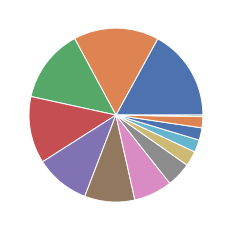

In [34]:
plt.pie(df['MERCHANTID'].value_counts())

#  3 - CurrencyType --> 

In [35]:
df['CURRENCYTYPE'].value_counts()

USD              17403
KHR               5817
99                 186
0                  133
66                 118
THB                 52
 USD                 6
?                    2
$                    1
LAK                  1
9000200031318        1
VND                  1
Name: CURRENCYTYPE, dtype: int64

In [36]:
# df["CURRENCYTYPE"] = df["CURRENCYTYPE"].astype('category')

In [37]:
# df["CURRENCYTYPE"] = df["CURRENCYTYPE"].cat.codes

In [38]:
# plt.hist(df['CURRENCYTYPE'])
# # plt.yscale('linear')
# plt.show()

In [39]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace =" USD", 
                 value ="USD")

In [40]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace =["?", "$","VND","LAK","9000200031318"],  
                            value ="USD") 

In [41]:
df['CURRENCYTYPE'].unique()

array(['USD', 'KHR', '0', nan, '99', '66', 'THB'], dtype=object)

In [42]:
df['CURRENCYTYPE'].isna().sum()

513

In [43]:
# # will replace  Nan value in dataframe with value -99999  
# df['CURRENCYTYPE']=df.replace(to_replace = np.nan, value ="USD") 

In [44]:
from numpy import nan

In [45]:
df['CURRENCYTYPE']=df['CURRENCYTYPE'].replace(to_replace =nan, 
                 value ="USD")

In [46]:
df['CURRENCYTYPE'].value_counts()

USD    17928
KHR     5817
99       186
0        133
66       118
THB       52
Name: CURRENCYTYPE, dtype: int64

In [47]:
df['CURRENCYTYPE'].isna().sum()

0

In [48]:
# df["CURRENCYTYPE"]=pd.get_dummies(df, columns=["CURRENCYTYPE"]).head()

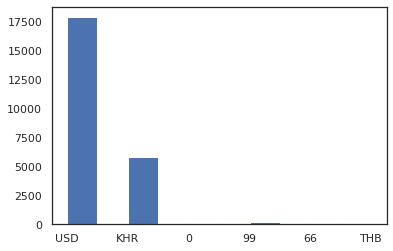

In [49]:
plt.hist(df['CURRENCYTYPE'])
# plt.yscale('linear')
plt.show()

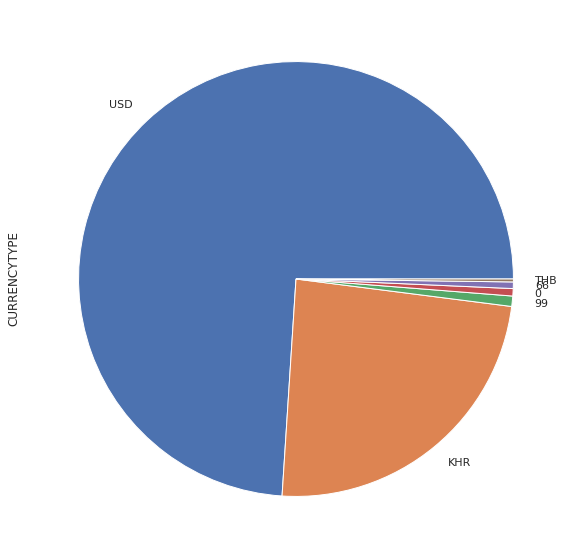

In [50]:
serie = df.loc[:,"CURRENCYTYPE"].value_counts()
serie.plot(kind='pie',figsize=(10,10))

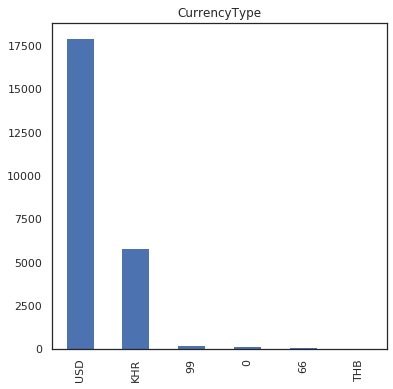

In [51]:
serie.plot(kind='bar',figsize=(6,6),title="CurrencyType")

# 4- AMOUNT

In [52]:
df['AMOUNT'].value_counts()

100.0        3274
1.0          2989
10.0         1726
2.0          1524
270.0        1351
             ... 
7450000.0       1
3100.0          1
9100.0          1
500000.0        1
56.0            1
Name: AMOUNT, Length: 976, dtype: int64

In [53]:
df['AMOUNT'].describe()

count    2.423200e+04
mean     6.323646e+12
std      9.819771e+14
min     -1.000000e+03
25%      2.000000e+00
50%      5.000000e+01
75%      5.000000e+02
max      1.528606e+17
Name: AMOUNT, dtype: float64

# 5- INVOICEID  --> Drop

In [54]:
df['INVOICEID'].value_counts()

1234                     2571
543210                   1451
421386546                 683
0                         594
20170220                  569
                         ... 
180528220096139             1
180531220098212             1
1533898256172               1
2.01805071509197E+024       1
2.01804271430062E+024       1
Name: INVOICEID, Length: 10975, dtype: int64

In [55]:
df['INVOICEID'].isna().sum()

880

In [56]:
df=df.drop(labels="INVOICEID",axis=1)

In [57]:
#############droping as of no use

# 6- DESCRIPTION --> (NO use)

In [58]:
df['DESCRIPTION'].value_counts()

1@Motorola156        2876
1@Motorola X Play    2070
1@coobillClient      1443
0@0                  1293
1@TAXGDT             1083
                     ... 
1@BMC142018I4           1
1@B24(FwM3scxK)         1
1@KRT112018I4           1
1@B24(t4u1IAUP)         1
1@WDL/C/3456/LHPP       1
Name: DESCRIPTION, Length: 691, dtype: int64

In [59]:
df['DESCRIPTION'].isna().sum()

138

# 7- Payment option

In [60]:
df['PAYMENTOPTION'].value_counts()

1       10555
2        5201
1.0      4147
2.0      3252
0         263
4.0       261
4         157
3.0       149
3         138
-1.0       34
0.0         6
KHR         1
Name: PAYMENTOPTION, dtype: int64

In [61]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=2.0,
                                               value="2")

In [62]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=4.0,
                                               value="4")

In [63]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=3.0,
                                               value="3")

In [64]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=1.0,
                                               value="1")

In [65]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace=0.0,
                                               value="0")

In [66]:
df['PAYMENTOPTION']=df['PAYMENTOPTION'].replace(to_replace="KHR",
                                               value=-1.0)

In [67]:
serie = df['PAYMENTOPTION'].value_counts()

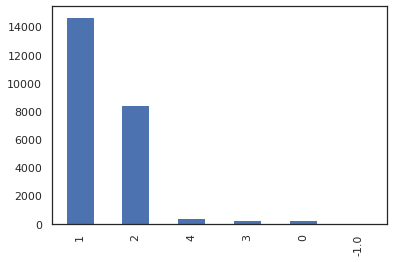

In [68]:
serie.plot(kind='bar')

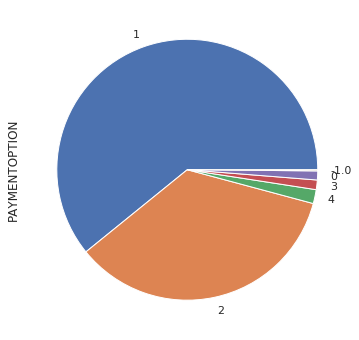

In [69]:
serie.plot(kind='pie',figsize=(6,6))

# 8-> PAYMENTOPTIONDESC (device info)

In [70]:
df['PAYMENTOPTIONDESC'].value_counts()

1@Motorola156        2506
1@Motorola X Play    1727
1@coobillClient      1225
mobile               1120
1@TAXGDT             1063
                     ... 
1@B24(c32gKNt8)         1
5@Tesjor Order          1
3@                      1
1@B24(v68pVy6d)         1
1@WDL/C/3456/LHPP       1
Name: PAYMENTOPTIONDESC, Length: 763, dtype: int64

In [71]:
df['PAYMENTOPTIONDESC'].nunique()

763

In [72]:
df['PAYMENTOPTIONDESC'].isna().sum()

1361

# 9- ACCTYPE

In [73]:
df['ACCTYPE'].value_counts()

2                   11652
1.0                  4375
1                    4000
2.0                  3474
SUCCESS                95
                    ...  
2018092516308737        1
2018090415555304        1
2018072900321121        1
2018081709554175        1
2018081709534766        1
Name: ACCTYPE, Length: 79, dtype: int64

In [74]:
df['ACCTYPE'].value_counts()

2                   11652
1.0                  4375
1                    4000
2.0                  3474
SUCCESS                95
                    ...  
2018092516308737        1
2018090415555304        1
2018072900321121        1
2018081709554175        1
2018081709534766        1
Name: ACCTYPE, Length: 79, dtype: int64

In [75]:
df['ACCTYPE']= df['ACCTYPE'].replace(to_replace=2.0,value="2")

In [76]:
df['ACCTYPE']= df['ACCTYPE'].replace(to_replace=1.0,value="1")

In [77]:
df['ACCTYPE']= df['ACCTYPE'].replace(to_replace="You have mobile one time password security token assigned.</br> please use that for generating OTP.",value="Regenrate OTP")

In [78]:
df['ACCTYPE']= df['ACCTYPE'].replace(to_replace="One Time Password is sent to your registered mobile number. </br> Please check your mobile.",value="OTP_Sent")

In [79]:
serie=df['ACCTYPE'].value_counts()

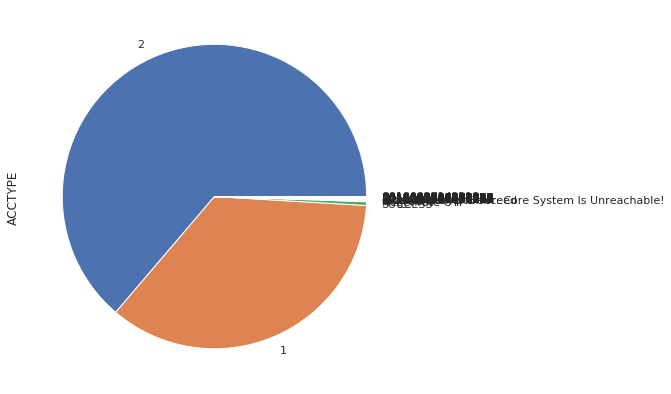

In [80]:
serie.plot(kind='pie',figsize=(7,7))

# 10- EXPIRYTIME (drop)

In [81]:
df['EXPIRYTIME'].value_counts()

 5.000000e+00    15942
 3.000000e+00     3972
 1.000000e+00     1207
 0.000000e+00      940
 1.000000e+01      718
 3.000000e+01      223
 2.000000e+00      142
 1.500000e+01      127
 8.000000e+01      110
 4.310000e+02       76
 4.150000e+02       50
 6.000000e+01       33
 1.022141e+10       23
 6.000000e+00       22
 3.801015e+13       14
 3.411004e+13       11
 1.022141e+10        9
 3.411002e+13        9
 1.022141e+10        7
 8.000000e+00        6
 3.801022e+13        3
 1.020521e+10        2
 1.018962e+10        2
 3.411022e+13        2
 3.411006e+13        2
 1.018962e+10        2
 3.411019e+13        1
 3.411019e+13        1
 1.018962e+10        1
 1.022142e+10        1
 3.446019e+13        1
-2.000000e+00        1
-1.000000e+00        1
 3.411019e+13        1
 1.022141e+10        1
 3.487019e+13        1
 1.086982e+10        1
Name: EXPIRYTIME, dtype: int64

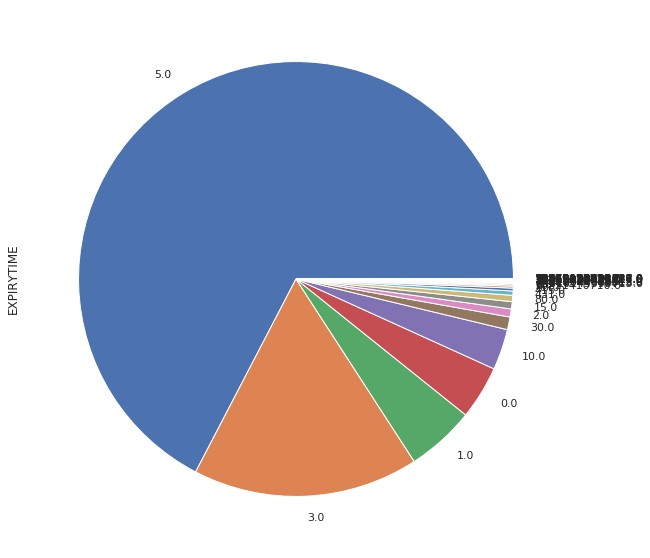

In [82]:
serie=df['EXPIRYTIME'].value_counts()
serie.plot(kind='pie',figsize=(10,10))

# 11- AUTHRESULT 

In [83]:
df['AUTHRESULT'].value_counts()

66      6870
99      5551
66.0    3422
0       3231
99.0    2644
0.0     1783
1        168
2         95
USD        1
Name: AUTHRESULT, dtype: int64

In [84]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace="USD",value="66")

In [85]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=66.0,value="66")

In [86]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=99.0,value="99")

In [87]:
df['AUTHRESULT']=df['AUTHRESULT'].replace(to_replace=0.0,value="0")

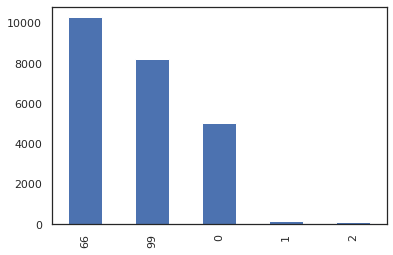

In [88]:
serie=df['AUTHRESULT'].value_counts()
serie.plot(kind='bar')

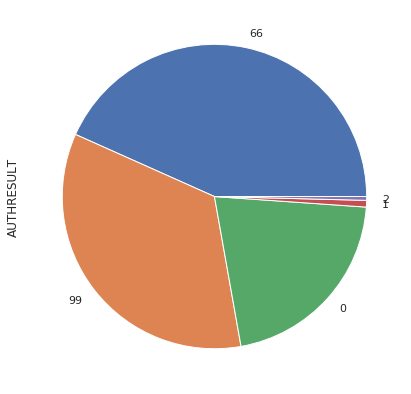

In [89]:
serie.plot(kind='pie',figsize=(7,7))

# 12- TRANSACTIONRESULT

In [90]:
df['TRANSACTIONRESULT'].value_counts()

66                                  6870
99                                  5551
66.0                                3422
0                                   3237
99.0                                2644
0.0                                 1783
-256                                  38
USD                                   21
1                                     19
KHR                                   13
THB                                   10
-99                                    2
-253                                   1
-1                                     1
-257                                   1
XPAYtR7bvK5EkZr2FQbiDq6ck3drz8E=       1
Name: TRANSACTIONRESULT, dtype: int64

In [91]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace=66.0,
                                                       value="66")

In [92]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace=99.0,
                                                       value="99")

In [93]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace=0.0,
                                                       value="0")

In [94]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace="XPAYtR7bvK5EkZr2FQbiDq6ck3drz8E=",
                                                       value="-1")

In [95]:
serie=df['TRANSACTIONRESULT'].value_counts()

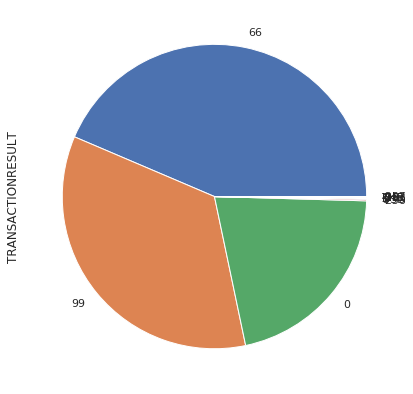

In [96]:
serie.plot(kind='pie',figsize=(7,7))

# 13- AMOUNTDEDUCTED

In [97]:
df['AMOUNTDEDUCTED'].value_counts()

0.0       23720
1.0          21
4100.0       13
32.0          5
33.0          4
34.0          1
Name: AMOUNTDEDUCTED, dtype: int64

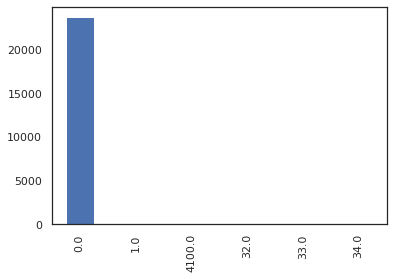

In [98]:
serie=df['AMOUNTDEDUCTED'].value_counts()
serie.plot(kind='bar')

In [99]:
df=df.drop(labels="AMOUNTDEDUCTED",axis=1)

In [100]:
##########dropping as of no use

# 14 - TRANSACTIONTIME

In [101]:
df['TRANSACTIONTIME'].value_counts()

14-JUL-17    354
17-JUL-17    345
26-APR-18    316
07-JUN-17    292
12-MAR-18    281
            ... 
29-OCT-17      1
22-JUL-18      1
02-NOV-17      1
23-OCT-18      1
03-NOV-18      1
Name: TRANSACTIONTIME, Length: 496, dtype: int64

In [102]:
#first date---  14 jul 2017
#last daet --- 28 march 2019

In [103]:
df=df.drop(labels="TRANSACTIONTIME",axis=1)

# 15- ERRORMESSAGE

In [104]:
df['ERRORMESSAGE'].value_counts()

SUCCESS        4950
CANCELLED      3882
EXPIRED        3788
Not Checked    3348
CANCEL         1623
PENDING         720
0               168
2                95
FAILED           71
Name: ERRORMESSAGE, dtype: int64

In [105]:
df['ERRORMESSAGE'].isna().sum()

5589

In [106]:
df['ERRORMESSAGE'].count()

18645

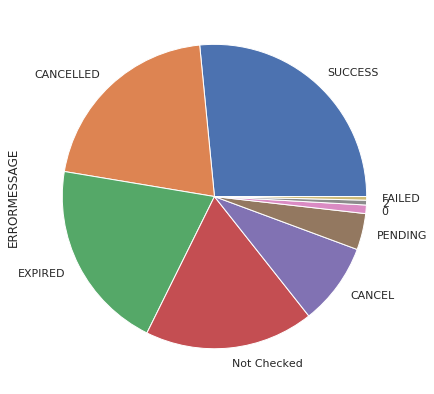

In [107]:
serie=df['ERRORMESSAGE'].value_counts()
serie.plot(kind='pie',figsize=(7,7))

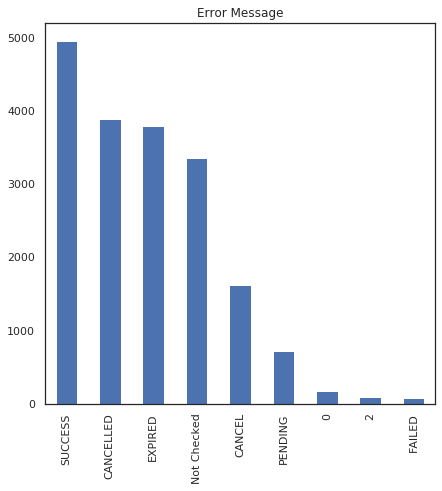

In [108]:
serie.plot(kind='bar',figsize=(7,7),title="Error Message")

# 16- CALLBACKRESULT

In [109]:
df['CALLBACKRESULT'].value_counts()

SUCCESS                                                                                                  4950
One Time Password is sent to your registered mobile number. </br> Please check your mobile.              1688
You have mobile one time password security token assigned.</br> please use that for generating OTP.       669
ERROR                                                                                                     428
User Identified Successfully                                                                              422
Invalid Attempts exceed                                                                                   361
Sorry                                                                                                     272
0                                                                                                         239
Internal Server Error::Core System Is Unreachable!                                                        200
success   

In [110]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace="One Time Password is sent to your registered mobile number. </br> Please check your mobile.",
                                                       value="OTP_Send")

In [111]:
df['TRANSACTIONRESULT']=df['TRANSACTIONRESULT'].replace(to_replace="You have mobile one time password security token assigned.</br> please use that for generating OTP.",
                                                       value="Use_Mobile_OTP")

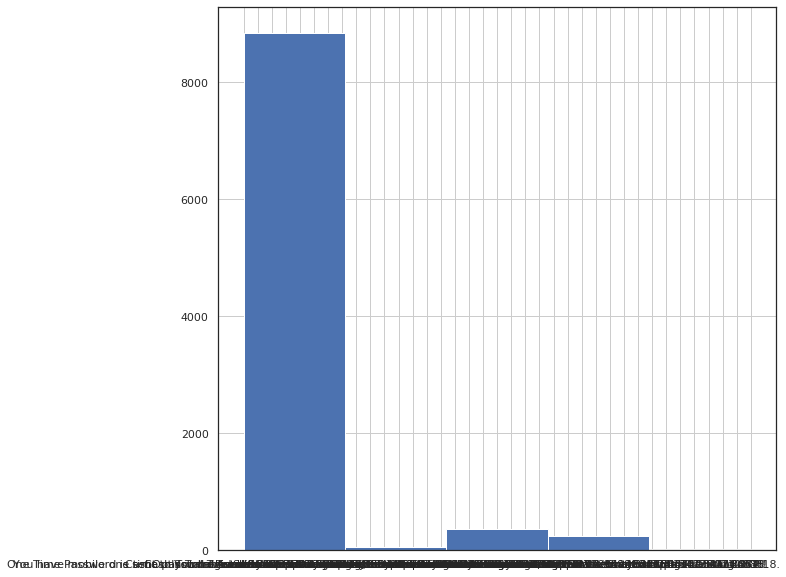

In [112]:
serie=df['CALLBACKRESULT'].value_counts()
df['CALLBACKRESULT'].hist(bins=5,figsize=(10,10))

# 17- CLOSESTATUS

In [113]:
df['CLOSESTATUS'].value_counts()

1                                                                                            18215
2                                                                                             4952
 One Time Password could not be sent. </br> Please click on Resend New OTP to get new OTP      272
0                                                                                               68
-1                                                                                              61
                                                                                             ...  
FT182270JXW9RPB7                                                                                 1
FT182610LLY1P2JJ                                                                                 1
FT182110T0DLCS5J                                                                                 1
FT182270JXW9PTZT                                                                                 1
FT181970RC

In [114]:
df['CLOSESTATUS'].count

<bound method Series.count of 0          1
1          1
2          1
3          1
4          2
        ... 
24229      1
24230      1
24231      1
24232      1
24233    NaN
Name: CLOSESTATUS, Length: 24234, dtype: object>

In [115]:


df['CLOSESTATUS']=df['CLOSESTATUS'].replace(to_replace=" One Time Password could not be sent. </br> Please click on Resend New OTP to get new OTP",
                                                       value="Resend_OTP")

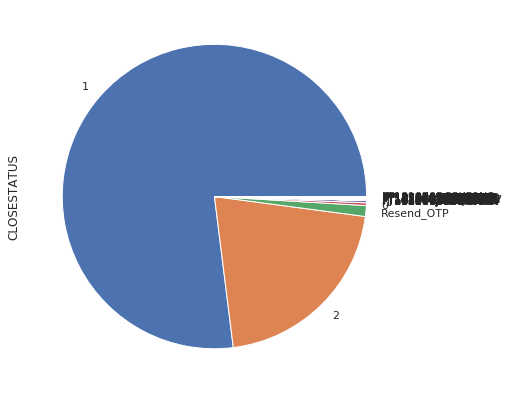

In [116]:
serie=df['CLOSESTATUS'].value_counts()
serie.plot(kind='pie',figsize=(7,7))

In [117]:
# serie.plot(kind='bar',figsize=(7,7))
# df['CLOSESTATUS'].hist(bins=2)

# 18- FEECURRENCY 

In [118]:
df['FEECURRENCY'].value_counts()

USD                 3149
KHR                  887
0                    263
THB                  255
2018060709105857       1
                    ... 
2017071911252835       1
2017060518228105       1
2017102511425458       1
201706091339142        1
2018102214028978       1
Name: FEECURRENCY, Length: 276, dtype: int64

In [119]:
df['FEECURRENCY'].isna().sum()

19408

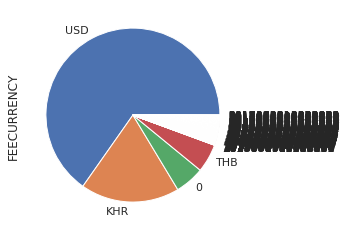

In [120]:
serie=df['FEECURRENCY'].value_counts()
serie.plot(kind='pie')

In [121]:
# serie.plot(kind='bar')

In [122]:
# # Iterate over two given columns only from the dataframe
# for column in df[['FEECURRENCY']]:
#     columnSeriesObj = df[column]
#     if(columnSeriesObj=="USD"):
#         print('Column Contents : ', columnSeriesObj.values)
#    # Select column contents by column name using [] operator
   
    
# #    print('Colunm Name : ', column)

   

In [123]:

# # Iterate over the sequence of column names
# for column in df:
#    # Select column contents by column name using [] operator
#     columnSeriesObj = df['FEECURRENCY']
#     print('Colunm Name : ', column)
#     print('Column Contents : ', columnSeriesObj.values)

# 19- FEEAMOUNT

In [124]:
df['FEEAMOUNT'].value_counts()

0          12731
0.0         6215
0.25        1139
0.5          669
0.5          510
           ...  
0.95           1
10000.0        1
0.81           1
2100.0         1
1708.0         1
Name: FEEAMOUNT, Length: 77, dtype: int64

# 20- CREDITCURRENCYTYPE

In [125]:
df['CREDITCURRENCYTYPE'].value_counts()

USD    3401
KHR    1556
0       272
THB      55
Name: CREDITCURRENCYTYPE, dtype: int64

In [126]:
df['CREDITCURRENCYTYPE'].isna().sum()

18950

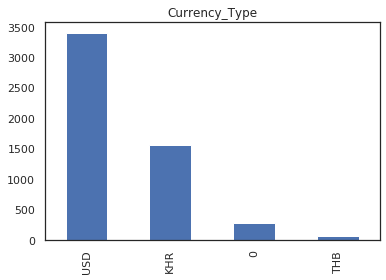

In [127]:
serie=df['CREDITCURRENCYTYPE'].value_counts()
serie.plot(kind='bar',title="Currency_Type")

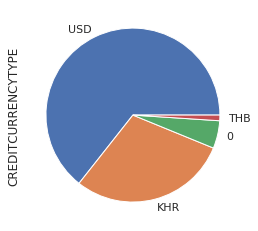

In [128]:
serie.plot(kind='pie')

# 21- FEETYPE

In [129]:
df['FEETYPE'].value_counts()

0.0    18215
2.0     4730
1.0      283
Name: FEETYPE, dtype: int64

In [130]:
df['FEETYPE'].count()

23228

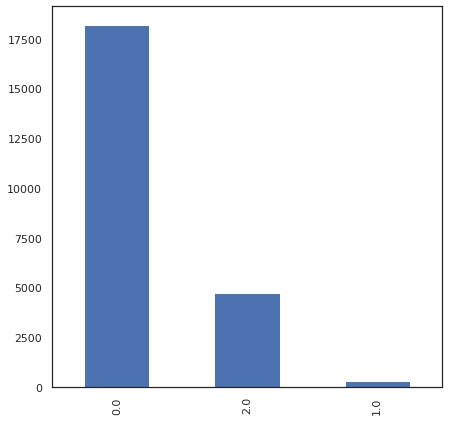

In [131]:
serie=df['FEETYPE'].value_counts()
serie.plot(kind='bar',figsize=(7,7))

# 22- RESERVE1

In [132]:
df['RESERVE1'].value_counts()

USD    3506
KHR    1203
THB     298
?         1
Name: RESERVE1, dtype: int64

In [133]:
df['RESERVE1'].isna().sum()

19226

In [134]:
df['RESERVE1'].count()

5008

In [135]:
df['RESERVE1']=df['RESERVE1'].replace(to_replace="?",value="USD")

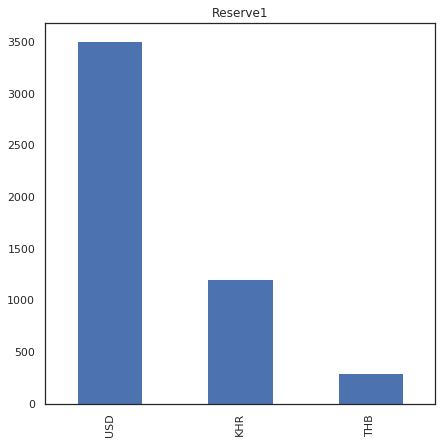

In [136]:
serie=df['RESERVE1'].value_counts()
serie.plot(kind='bar',figsize=(7,7),title="Reserve1")

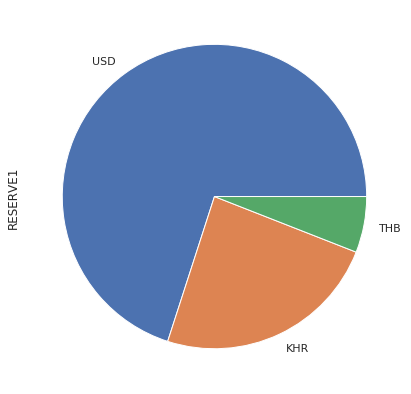

In [137]:
serie.plot(kind='pie',figsize=(7,7))

# 23- RESERVE2

In [138]:
df['RESERVE2'].value_counts()

0.0    13790
3.0     1058
1.5       99
2.5       86
Name: RESERVE2, dtype: int64

In [139]:
df['RESERVE2'].count()

15033

In [140]:
df['RESERVE2'].isna().sum()

9201

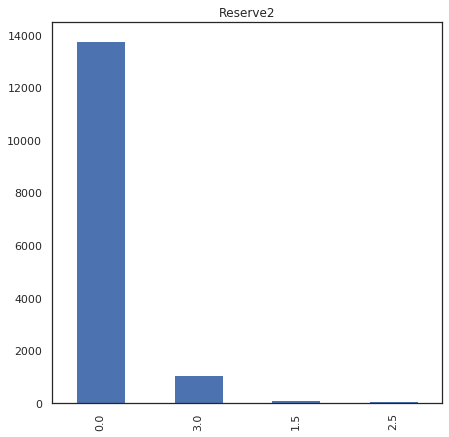

In [141]:
serie=df['RESERVE2'].value_counts()
serie.plot(kind='bar',figsize=(7,7),title="Reserve2")

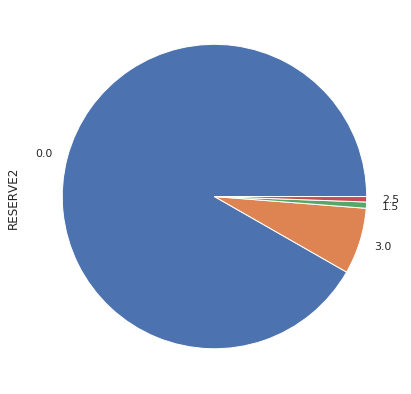

In [142]:
serie.plot(kind='pie',figsize=(7,7))

# 24- TXDIRECTION

In [146]:
df['TXDIRECTION'].value_counts()

0.000000e+00    14696
2.000000e+00     4284
1.000000e+00     4248
1.086982e+10       14
1.022142e+10        9
9.000870e+12        8
1.086982e+10        3
Name: TXDIRECTION, dtype: int64

In [147]:
df['TXDIRECTION'].isna().sum()

972

In [148]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=10869821811.0,
                                           value=0)

In [149]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=102214217617.0,
                                           value=0)

In [150]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=10869821811.0,
                                           value=0)

In [151]:
df['TXDIRECTION']=df['TXDIRECTION'].replace(to_replace=10869821811.0,
                                           value=0)

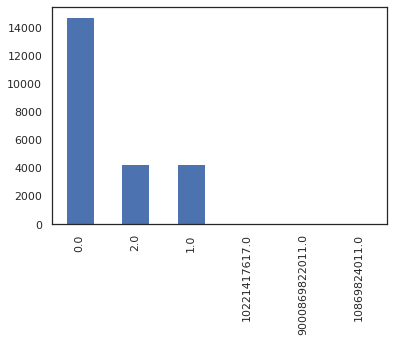

In [152]:
serie=df['TXDIRECTION'].value_counts()
serie.plot(kind='bar')

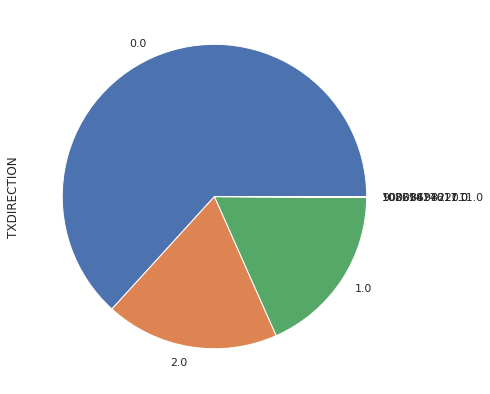

In [153]:
serie.plot(kind='pie',figsize=(7,7))

# 25- FAILEDREASON

In [154]:
df['FAILEDREASON'].value_counts()

CashOut Total Transaction per Day is higher than permitted Limit of Transaction.!!!       38
13030a4da302aab0dcbe69f7793bd7fde3360f42                                                  26
MOPHYNA                                                                                   20
XPAYjYFJeU8xgXPvLC5gO98MJaHiVdQ=                                                          11
XPAYpYttBoM8wRpxoNWQZqzqM0jxKBE=                                                           8
Wrong Attempts Limit Exceeded ...!!!                                                       7
CHARGE.AMT:1:1=EB-MISSING.RECORD                                                           5
Unauthorised overdraft of USD 15.27 on account 34730011130518.                             4
XPAYgZ78W3ofH8AU2inBztEp/P/A96I=                                                           4
XPAYqlcvrEwOh7eO5BKjnD86tQeDVT4=                                                           4
XPAYSFesdthwrjTvehlDA3/3/Yq6IKc=                                      

In [155]:
df['FAILEDREASON'].nunique()

34

In [156]:
df['FAILEDREASON'].isna().sum()

24067

# MINISTERY_TYPE

In [157]:
df['MINISTERY_TYPE'].value_counts()

0.0    1172
Name: MINISTERY_TYPE, dtype: int64

In [158]:
df['MINISTERY_TYPE'].isna().sum()

23062

# MINISTERY_STATUS

In [159]:
df['MINISTERY_STATUS'].value_counts()

0.0    1174
Name: MINISTERY_STATUS, dtype: int64

In [160]:
df['MINISTERY_STATUS'].isna().sum()

23060

# MINISTERY_RESPONSE

In [161]:
df['MINISTERY_RESPONSE'].value_counts()

0.0    1
Name: MINISTERY_RESPONSE, dtype: int64

In [162]:
df['MINISTERY_RESPONSE'].isna().sum()

24233